<a href="https://colab.research.google.com/github/swarubm/msg-spam-or-not-/blob/main/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# cleaning data
#eda
# txt preprocess
#model building
#evaluation
#improvements
#deplouy
# website

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# it shows that unnamed columns having most null values thats why we are dropping them

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(6)

,v1,v2
2071,ham,Good night my dear.. Sleepwell&amp;Take care
4658,ham,I cant pick the phone right now. Pls send a me...
4273,ham,Ball is moving a lot.will spin in last :)so ve...
1604,ham,"God picked up a flower and dippeditinaDEW, lov..."
3280,ham,I tot it's my group mate... Lucky i havent rep...
5522,ham,Thats cool. I want to please you...


we should change the column name bcz v1 and v2 is confusing

In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(3)

,target,text
1344,ham,Were somewhere on Fredericksburg
3546,spam,Rock yr chik. Get 100's of filthy films &XXX p...
1841,ham,I am in your office na.


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

it cnverted words into binary numbers

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

,0
target,0
text,0


check for null values

In [15]:
df.duplicated().sum()

np.int64(403)

check for duplicated value

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

# EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x7e48f6b5e990>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

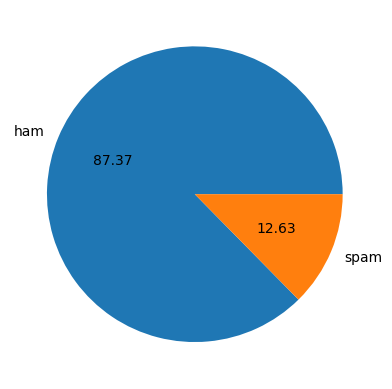

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

#from this pie chart we can see data imbalance

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['text'].apply(len)

,text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [25]:
df['num_char'] = df['text'].apply(len)

In [26]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df['text'].apply(lambda x: tokenizer.tokenize(x))

,text
0,"[Go, until, jurong, point, crazy, Available, o..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, U, c, already, t..."
4,"[Nah, I, don, t, think, he, goes, to, usf, he,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home]"
5569,"[Pity, was, in, mood, for, that, So, any, othe..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [27]:
df['text'].apply(lambda x:len(tokenizer.tokenize(x)))

,text
0,20
1,6
2,33
3,11
4,14
...,...
5567,33
5568,8
5569,10
5570,27


In [28]:
df['num_words'] = df['text'].apply(lambda x:len(tokenizer.tokenize(x)))

In [30]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [37]:

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.989940,1.965564
std,58.236293,11.518372,1.448541
min,2.000000,0.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,23.000000,2.000000
max,910.000000,190.000000,38.000000


In [39]:
df[df['target']==0][['num_char','num_words','num_sentences']].describe()  #for ham

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.600974,1.820195
std,56.358207,11.448193,1.383657
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,19.000000,2.000000
max,910.000000,190.000000,38.000000


In [40]:
df[df['target']==1][['num_char','num_words','num_sentences']].describe()   #for spam

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,25.595712,2.970904
std,30.137753,6.185684,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,27.000000,3.000000
75%,157.000000,29.000000,4.000000
max,224.000000,40.000000,9.000000


#we can see by describe function spam messeges are more lengthier than ham

In [41]:
import seaborn as sns

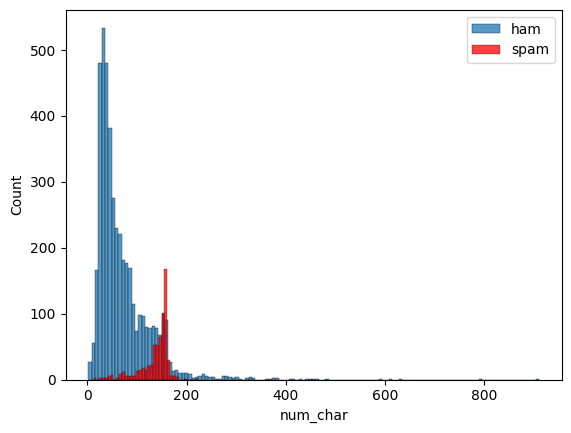

In [43]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')
plt.legend(['ham','spam'])

# for words

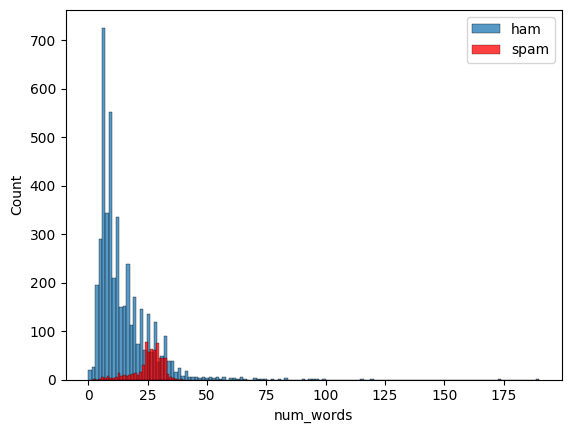

In [44]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.legend(['ham','spam'])

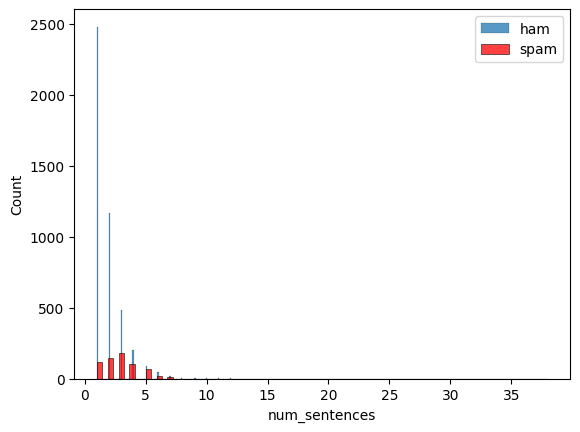

In [45]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')
plt.legend(['ham','spam'])

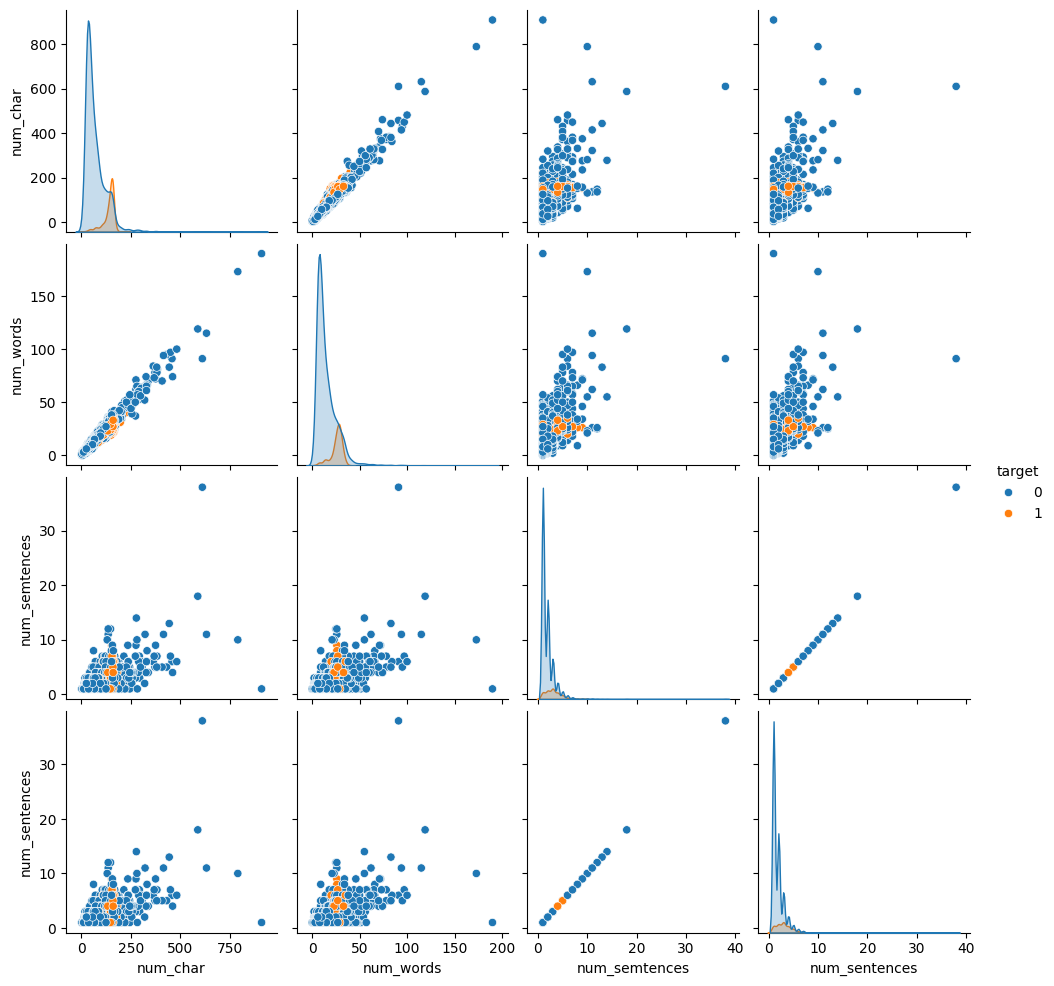

In [46]:
sns.pairplot(df,hue='target')

#we have outliers as well

In [50]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

<Axes: >

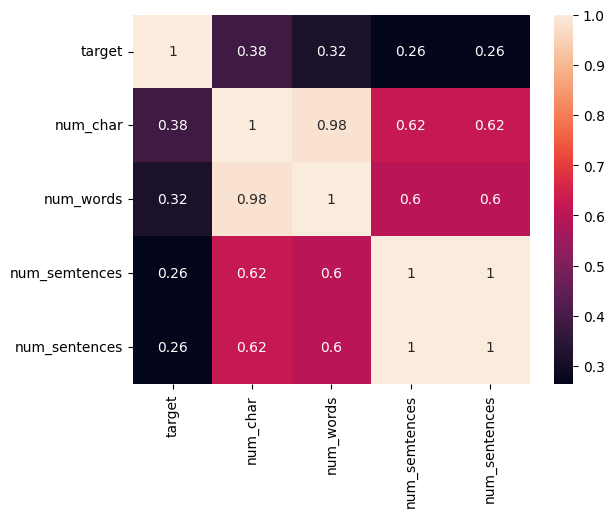

In [49]:
sns.heatmap(df.drop('text', axis=1).corr(), annot=True)

# 3 text processing